<a href="https://colab.research.google.com/github/krishnapatury/DataScience/blob/main/Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this market.
In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### **The objective:**

Coming up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

### **Data Dictionary**

The dataset contains the following attributes:
* S.No.: Serial Number
* Name: Name of the car which includes Brand name and Model name
* Location: The location in which the car is being sold or is available for purchase (Cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic / Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in KMPL or KM/KG
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in BHP
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR 100,000
* Price: The price of the used car in INR 100,000



### **Loading libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics to evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, recall_score, make_scorer
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Import Statsmodels 
import statsmodels.api as sm

import warnings

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Load the data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ADSP/MachineLearning/used_cars.csv")

Mounted at /content/drive


### **Understand the data by observing a few rows**

In [4]:
# View first and last 5 rows
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


There are 7253 observations with 14 features. The price variable is the target feature to predict based on the remaining independent features.

### **Checking the data types and missing values of each column** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

Serial Number, Year, and KM driven are integers. Mileage,Engine, Power, Seats, New_price, and Price are of type float. Name, Location, Fuel type, Owner Type and Transmission type are Strings.

Since 'S.No.' has no null values, and the number of unique values is equal to the number of observations it can be an index for the data entry and as such not useful in providing any predictive power for analysis. Hence, it can be dropped.

In [7]:
# Remove S.No. column from data. 
df.drop(columns=['S.No.'], axis=1, inplace=True)

## **Exploratory Data Analysis**

### **Exploring the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


The oldest car is from 1996 and newest from 2019. There seem too be outliers for the Kilometers driven which need to be addressed as the lowest km driven is 171, with 50% around 53K and the max of 6500000 which seems too high. Similarly for mileage the lowest mileage is zero which seems off. Most cars have 5 seats and the max price of a new car is 3,75,000,000.

### **Summary statistics of categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables.
df.describe(include = ['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [10]:
cat_cols = df.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    print(df[column].unique())
    print('-'*50)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------------------------------------
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
For column: Transmission
['Manual' 'Automatic']
--------------------------------------------------
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
--------------------------------------------------


We could observe from summary statistics that kilometers_driven has extreme values. Looking at the manufactured year for cars with extreme values for kilometers_driven might shed some light on this. Also, the feature mileage having values zero should be explored further.

**Check Kilometers_Driven extreme values**

In [11]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
df.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and removed.

In [12]:
# Removing the 'row' at index 2328 from the data. 
df.drop(index=2328, inplace=True)

**Check Mileage extreme values**

In [13]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
df.sort_values('Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


Mileage of cars can not be 0, so will treat these entries as missing values. 

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **Univariate Analysis - Numerical Data**
Uing a boxplots and histograms to help visualize and analyse the numerical data. 

In [14]:
def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined

    Function to create a boxplot and histogram for any input numerical column.

    feature: 1-d feature array
    figsize: size of fig (default (9, 8))
    bins: number of bins (default None / auto)  
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    # Boxplot will be created and a symbol will indicate the mean value of the column
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') 
    # For histogram
    sns.histplot(feature, kde = False, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.histplot(feature, kde = False, ax = ax_hist2) 
    # Add mean to the histogram
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') 
    # Add median to the histogram
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') 

Plotting histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

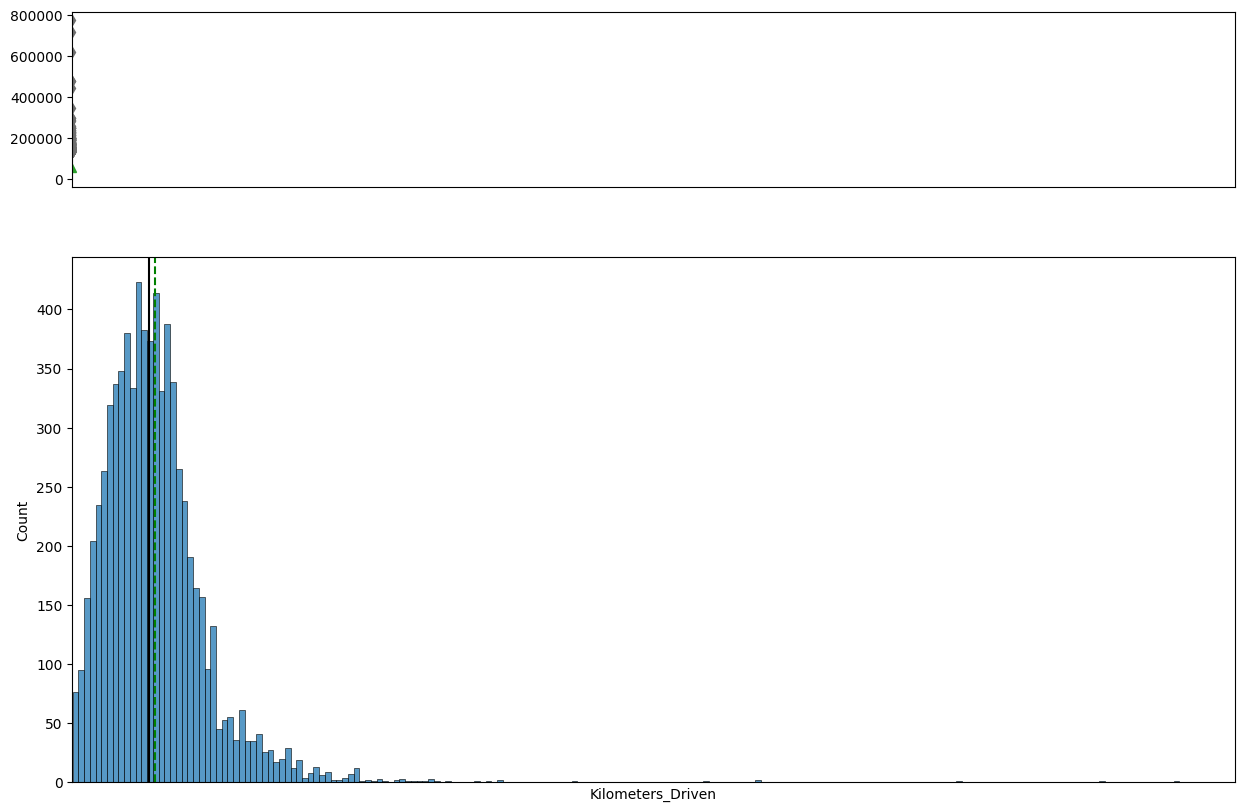

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(df['Kilometers_Driven'])

Kilometers_Driven is highly right-skewed. Will use Log transformation of the feature to reduce/remove the skewness as skewed data degrades the model's ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values.

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

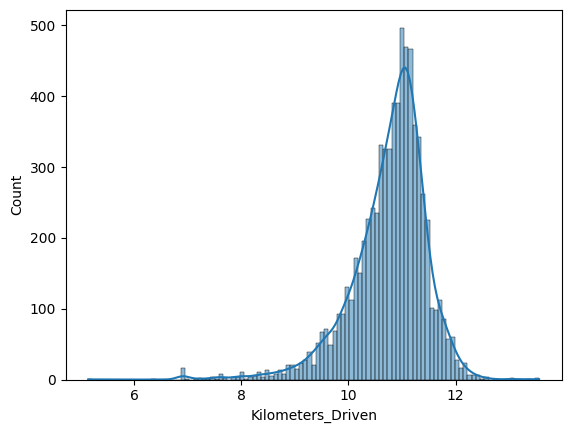

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.histplot(np.log(df["Kilometers_Driven"]), kde=True)

The log transformation seems to have a normalized distribution.

In [17]:
# Adding a transformed kilometers_driven feature in data
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

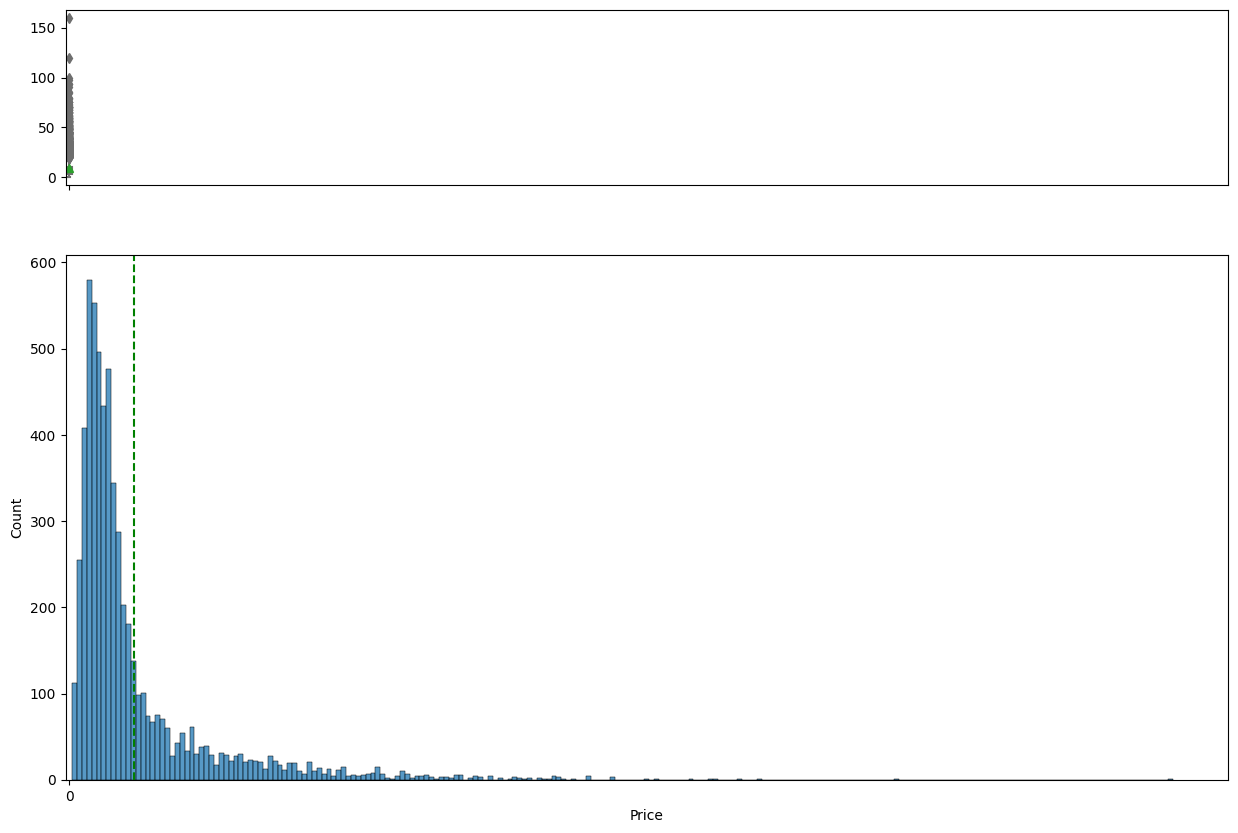

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(df['Price'])

Like Kilometers_Driven, the distribution of Price is also highly skewed. Will use log transformation on this column to see if that helps normalize the distribution, and add the transformed variable into the dataset. 

<Axes: xlabel='Price', ylabel='Count'>

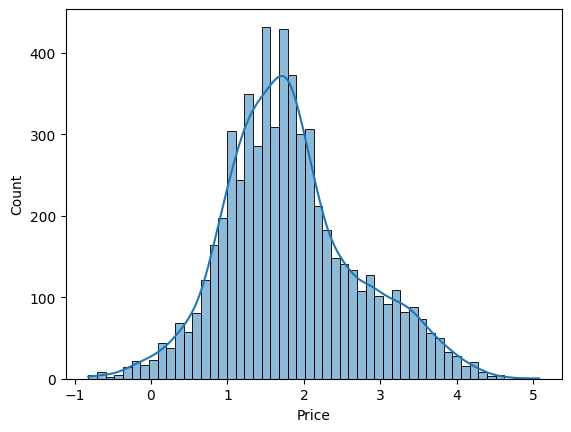

In [19]:
# Log transformation of the feature 'Price'
sns.histplot(np.log(df["Price"]), kde=True)

In [20]:
# We can Add a transformed Price feature in data
df["Price_log"] = np.log(df["Price"])

Plots for remaining numerical features to understand how the data looks.

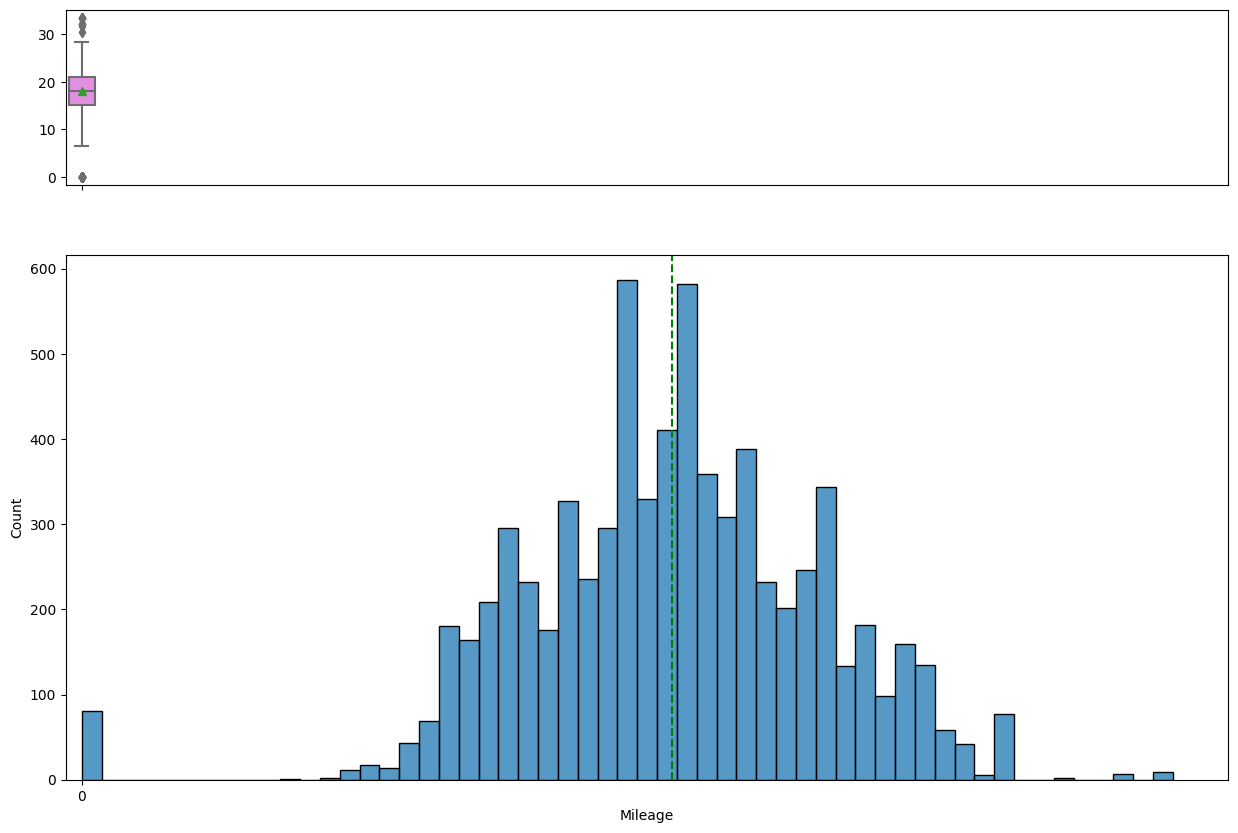

In [21]:
# Plot histogram and box-plot for 'Mileage'
histogram_boxplot(df['Mileage'])

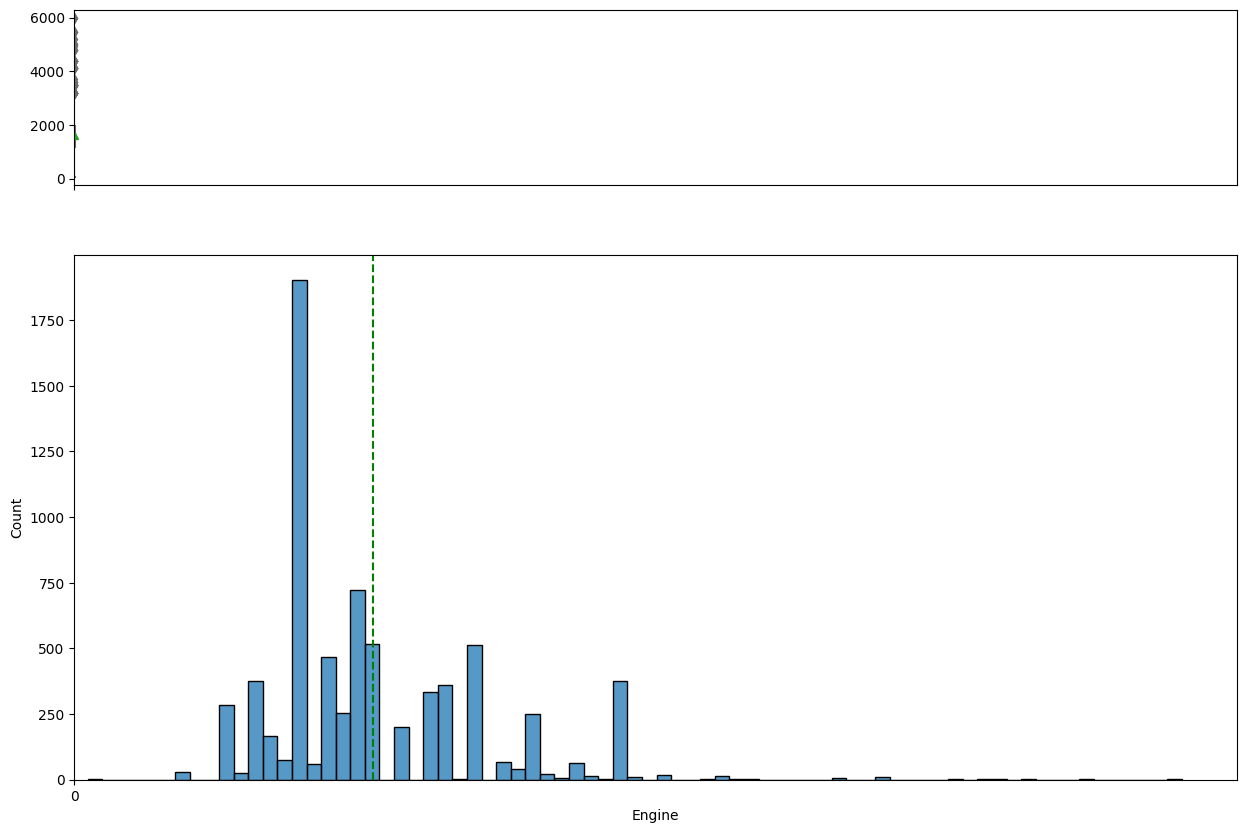

In [22]:
# Plot histogram and box-plot for 'Engine'
histogram_boxplot(df['Engine'])

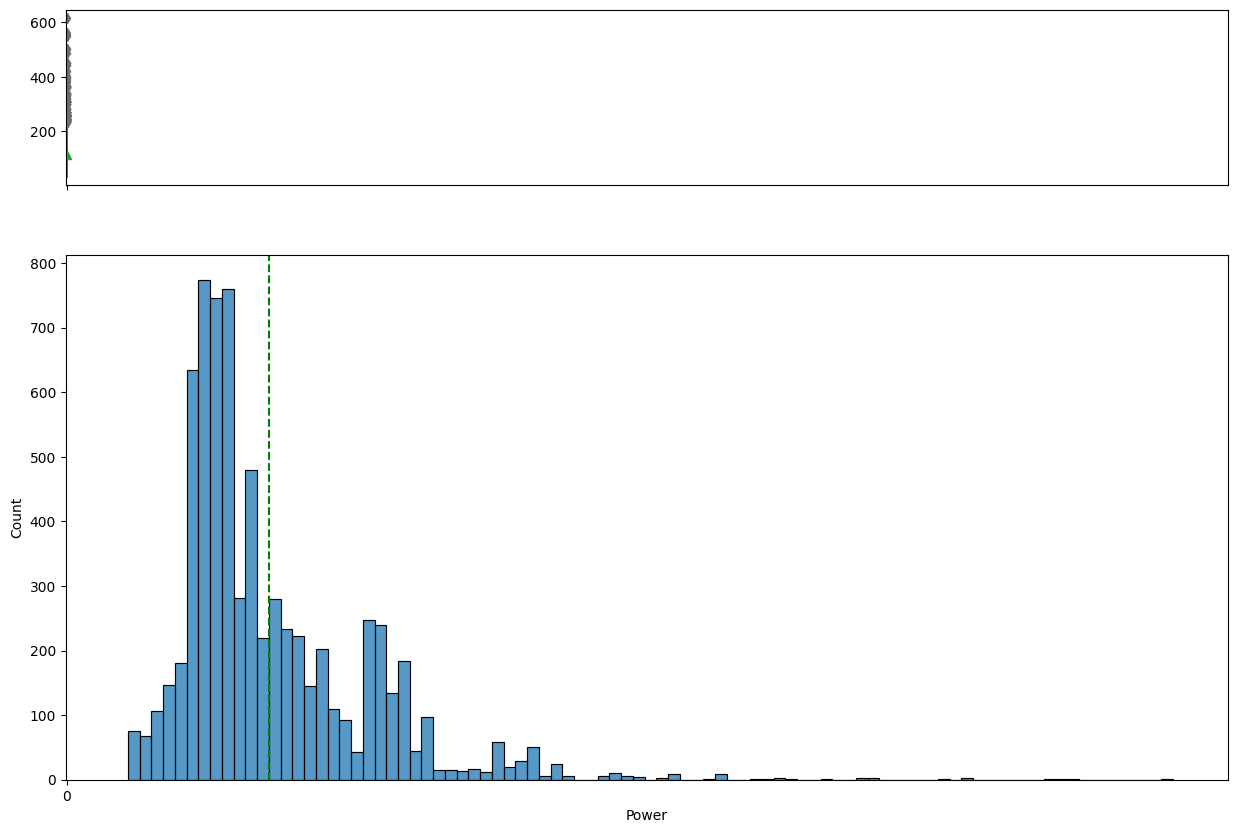

In [23]:
# Plot histogram and box-plot for 'Power'
histogram_boxplot(df['Power'])

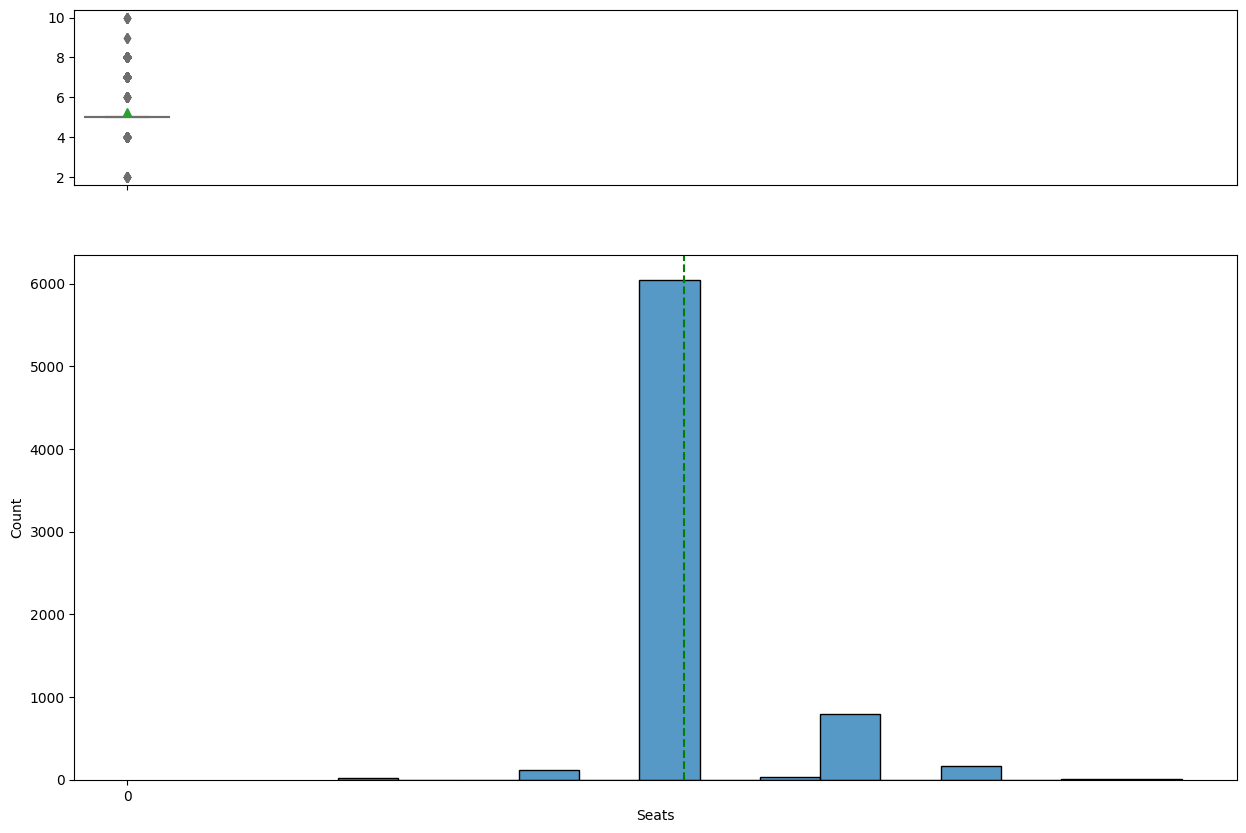

In [24]:
# Plot histogram and box-plot for 'Seats'
histogram_boxplot(df['Seats'])

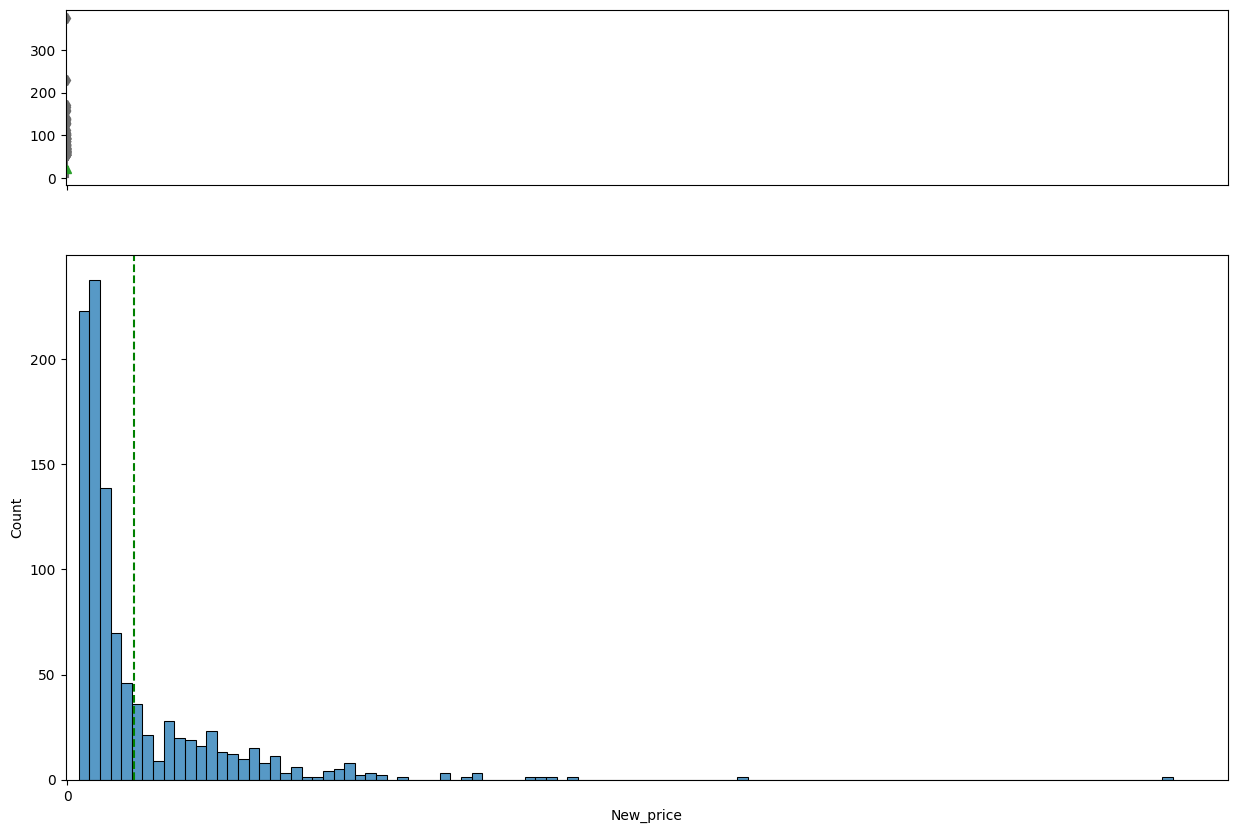

In [25]:
# Plot histogram and box-plot for 'New_price'
histogram_boxplot(df['New_price'])

<Axes: xlabel='New_price', ylabel='Count'>

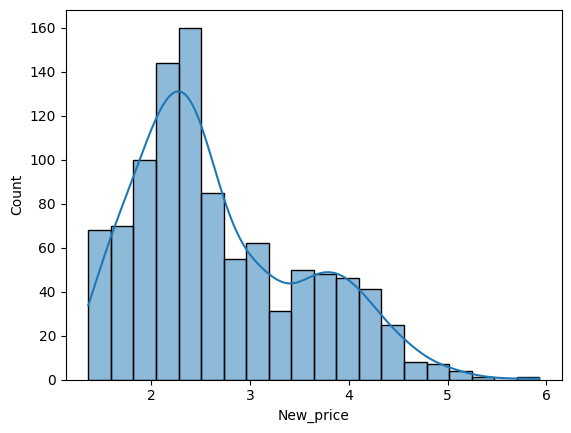

In [26]:
# Log transformation of the feature 'New_price'
sns.histplot(np.log(df["New_price"]), kde=True)

In [27]:
# We can Add a transformed Price feature in data
df["New_price_log"] = np.log(df["New_price"])

Mileage seems to have a few outliers but is normally distributed. Took a log transformation of the New_price as well as data was severely right skewed.

## Univariate analysis - Categorical Data

In [28]:
# Function to create barplots that indicate the percentage for each input 
# categorical column.

def perc_on_bar(cat_feature):
  '''
  plot
  feature: categorical feature
  the function won't work if a column is passed in hue parameter
  '''
    
  # Length of the column    
  total = len(cat_feature) 
  plt.figure(figsize = (15, 5))
  ax = sns.countplot(data=df, x=cat_feature, palette = 'Paired', order = cat_feature.value_counts().index)

  for p in ax.patches:

    # Percentage of each class of the category
    percentage = '{:.1f}%'.format(100 * p.get_height() / total) 
    # Width of the plot
    x = p.get_x() + p.get_width() / 2 - 0.05 
    # Height of the plot
    y = p.get_y() + p.get_height()           
    # Annotate the percentage 
    ax.annotate(percentage, (x, y), size = 12) 

  plt.show() 

Plotting barplot for the variable 'Location' to visualize the percentage distribution of cars across each city.

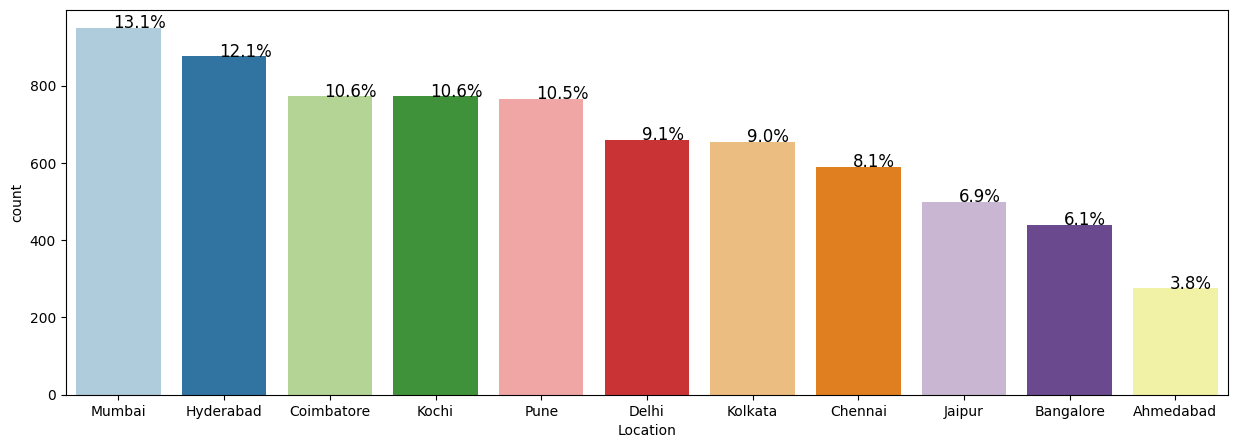

In [29]:
# Bar Plot for 'Location'
perc_on_bar(df['Location'])

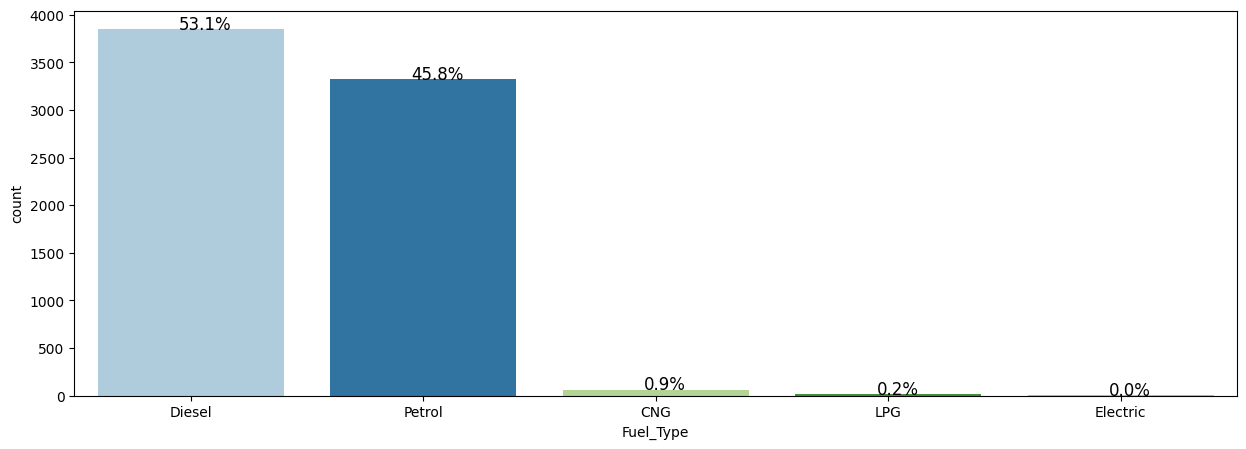

In [30]:
# Bar Plot for 'Fuel_Type'
perc_on_bar(df['Fuel_Type'])

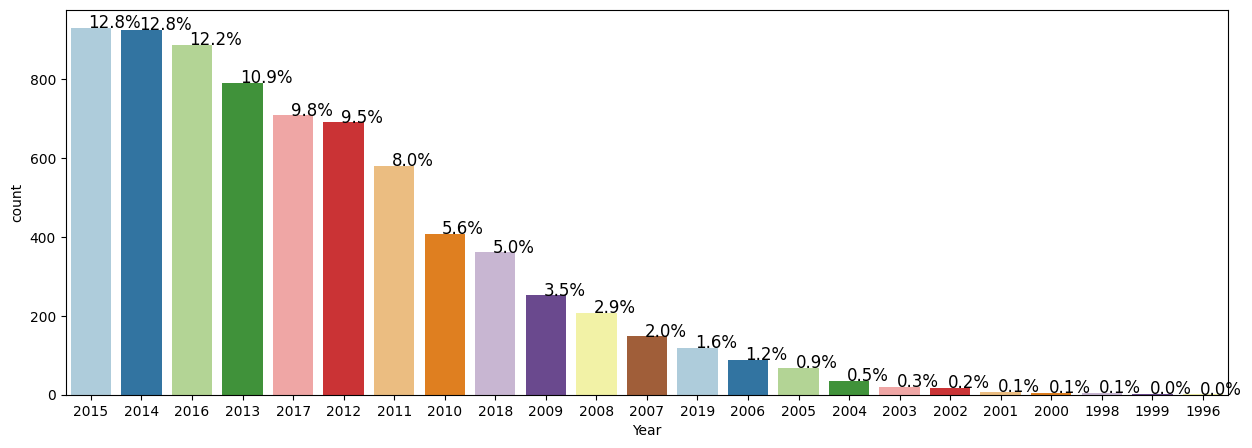

In [31]:
# Bar Plot for 'Year'
perc_on_bar(df['Year'])

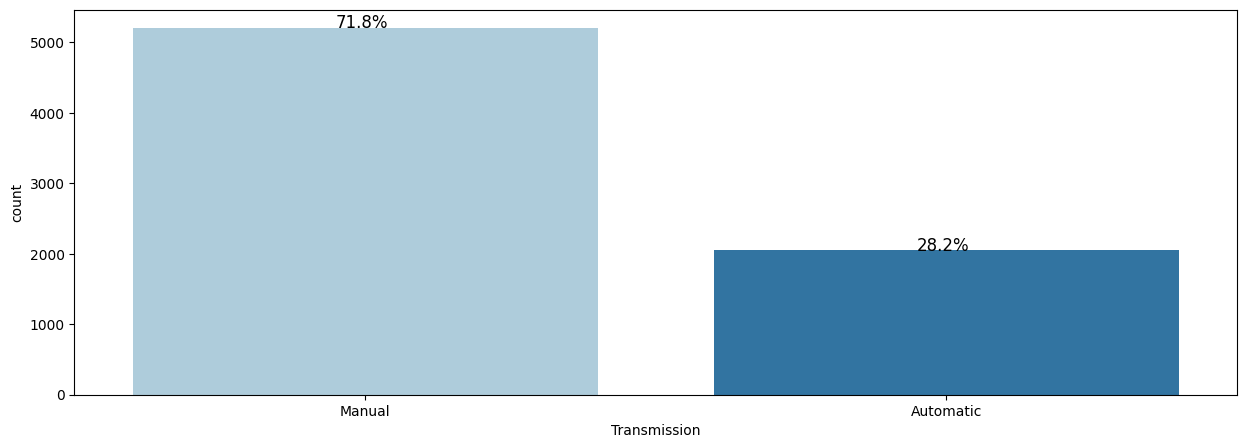

In [32]:
# Bar Plot for 'Transmission'
perc_on_bar(df['Transmission'])

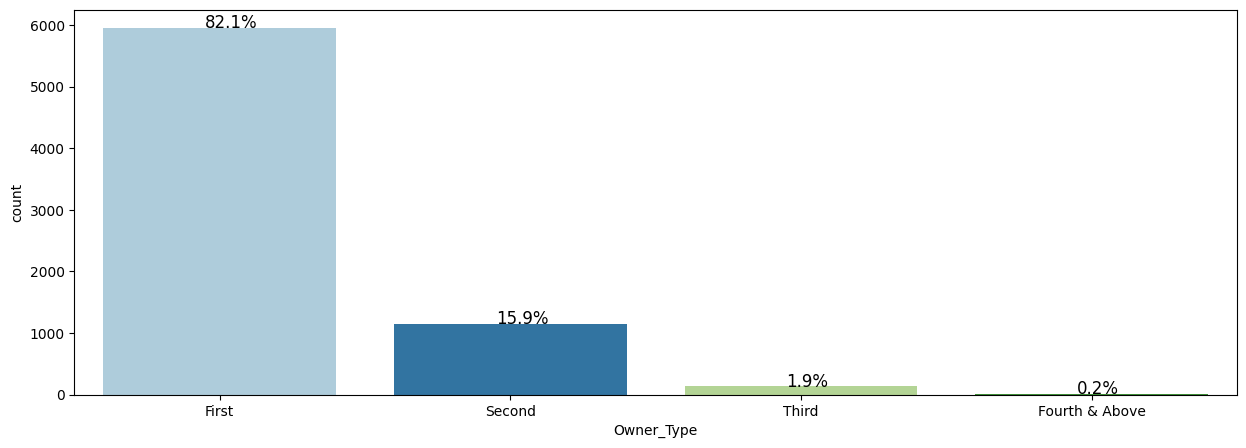

In [33]:
# Bar Plot for 'Owner_Type'
perc_on_bar(df['Owner_Type'])

Key Insights on the categorical data: 

* Mumbai and Hyderabad have the highest number of used cars for sale with 13.1% and 12.1% respectively followed by Coimbatore, Kochi, and Pune. Ahmedabad has the lowest number at 3.8% of the total inventory.
* 53.1% of the inventory uses Diesel, followed by Petrol at 45.8% with no electric cars on sale. 
* The highest percentage of cars are from 2015 and 2014 at 12.8% each. Only 0.1% of the cars are from 1998. All others are newer than 2000. 
* 71.8% have a manual transmission with the rest being automatic.
* 82.1% of the cars are first hand with 15.9% coming from second owner. Very few cars had more than 2 owners. 





## **Bivariate Analysis**

### Correlation between variables

<Axes: xlabel='Price_log'>

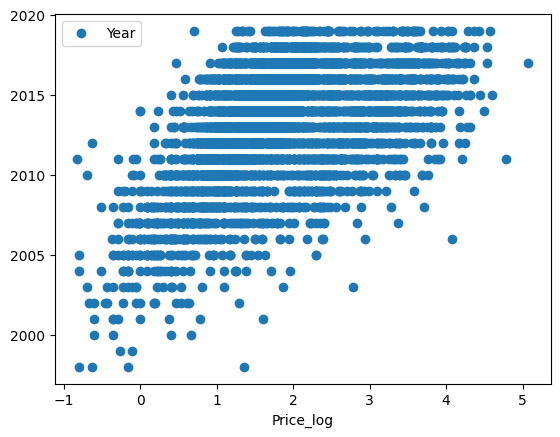

In [34]:
# Plot a pair plot for the variables 'year' and 'Price_log'
df.plot(x = 'Price_log', y = 'Year', style = 'o')

<Axes: xlabel='kilometers_driven_log'>

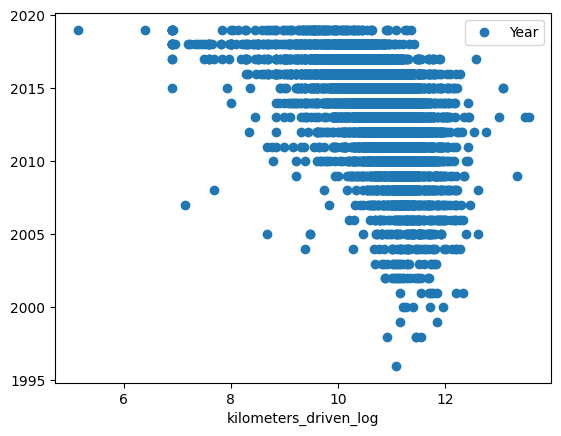

In [35]:
# Plot a pair plot for the variables 'year' and 'kilometers_driven_log'
df.plot(x = 'kilometers_driven_log', y = 'Year', style = 'o')

Heat map to view the 2D correlation matrix between numerical features.

<ipython-input-36-fec4378d0dac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['Price', 'Kilometers_Driven', 'New_price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)


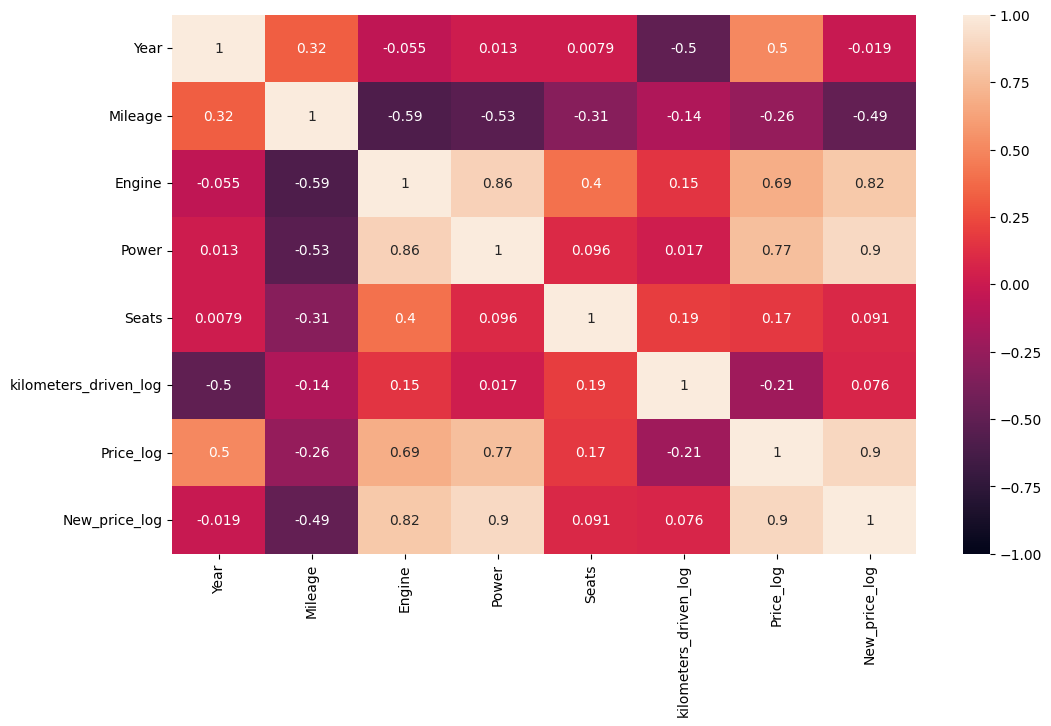

In [36]:
# Including the log transformation values and dropping the original skewed data columns
plt.figure(figsize = (12, 7))
sns.heatmap(df.drop(['Price', 'Kilometers_Driven', 'New_price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Engine and Power, Engine and Price of a New Car, Power and price of a new car or used car are all positively correlated which is expected.Mileage and price of car and Year and Kilometers driven have some negative correlation. 

### Box plots

In [37]:
# Function to create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    sns.boxplot(x = z, y = df['Price']) # Defining x and y
    
    plt.show()
    print("\n")
    plt.figure(figsize = (12, 5))
    plt.title('Without Outliers')

    # Turning off the outliers
    sns.boxplot(x = z, y = df['Price'], showfliers = False) 
    plt.show()

#### Bivariate analysis of target variable with a categorical variable 'Location'

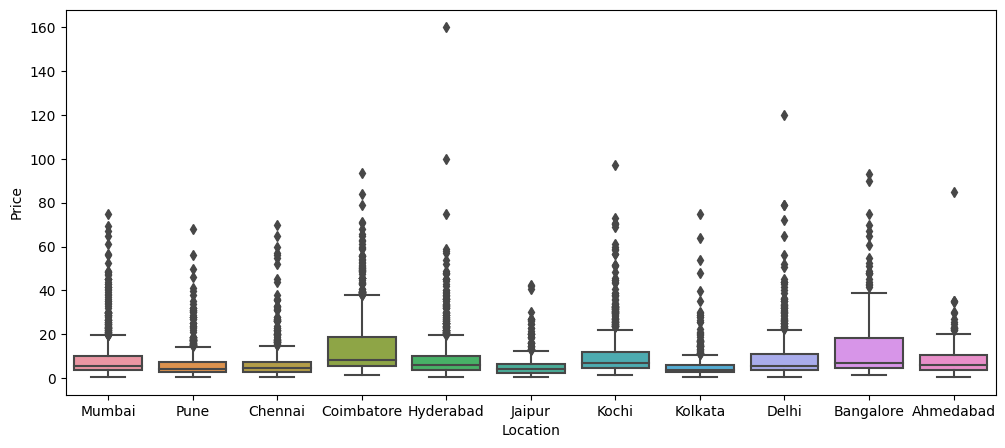

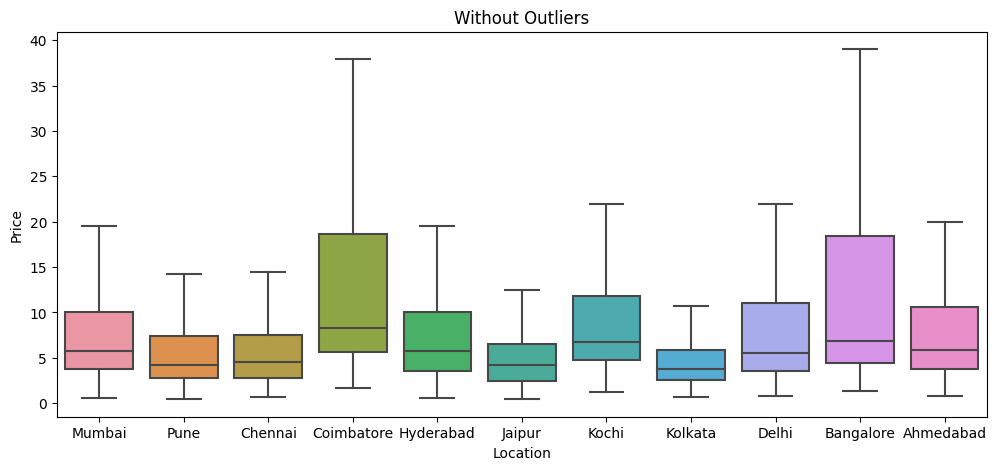

In [38]:
# Box Plot: Price vs Location
boxplot(df['Location'])

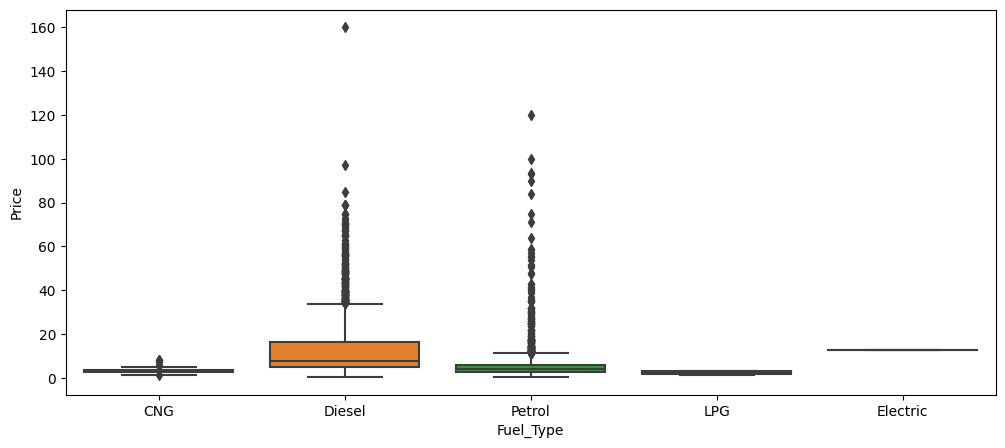

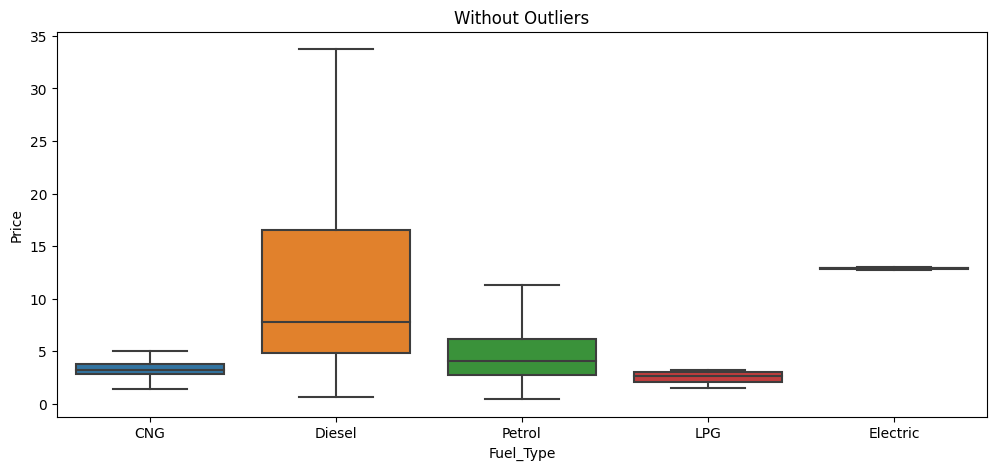

In [39]:
# Box Plot: Price vs Fuel_Type
boxplot(df['Fuel_Type'])

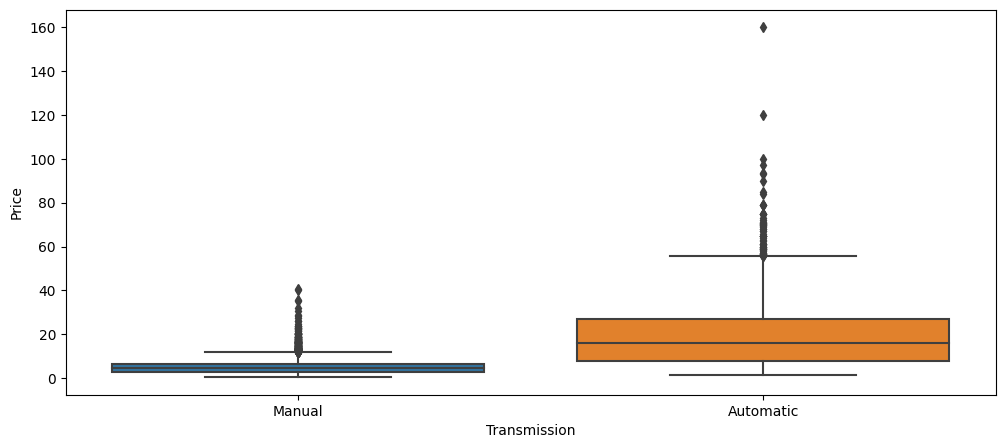

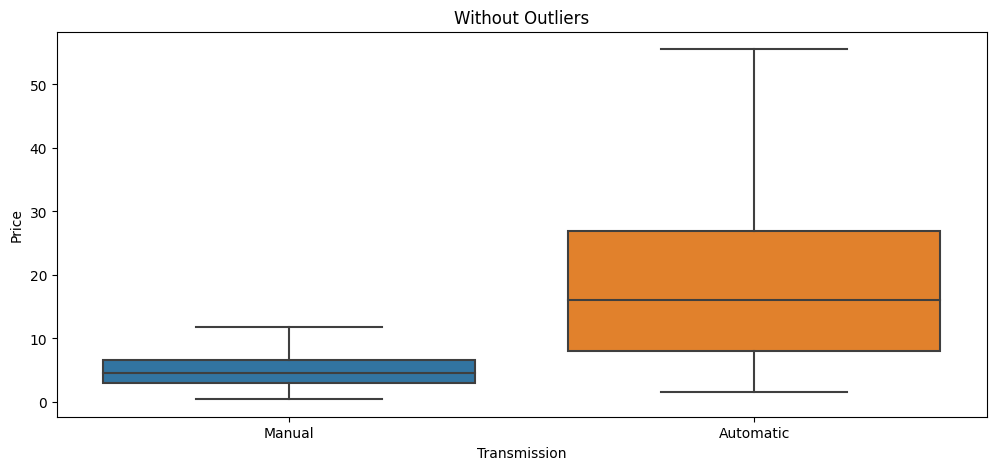

In [40]:
# Box Plot: Price vs Transmission
boxplot(df['Transmission'])

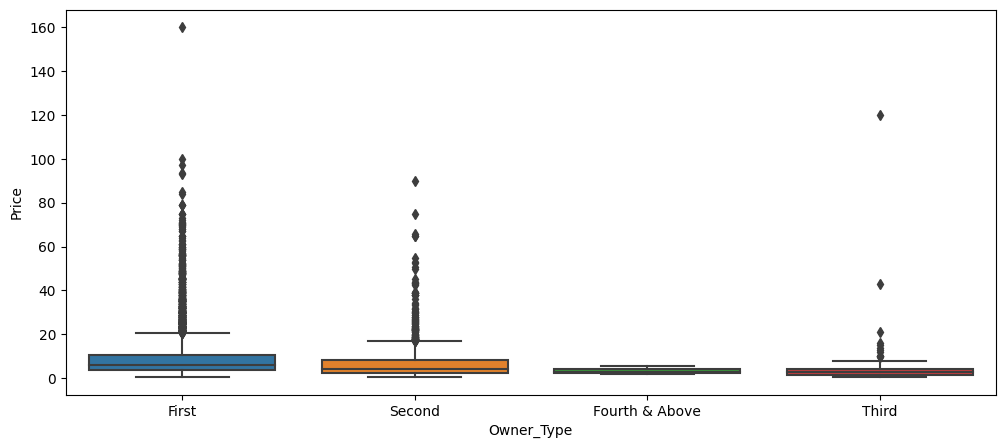

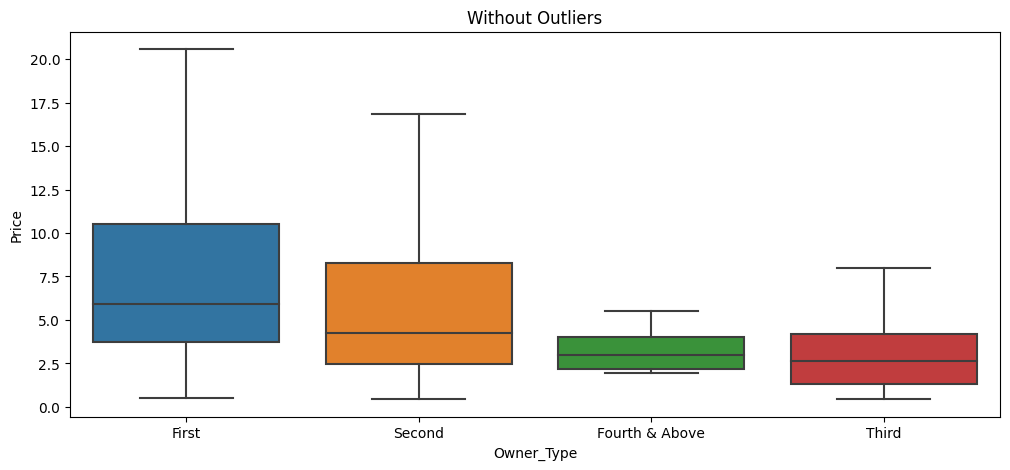

In [41]:
# Box Plot: Price vs Owner_Type
boxplot(df['Owner_Type'])

Most cars available for sale are Deisel with Automatic Transmission and had just one previous owner.


### **Feature Engineering**

In [42]:
df["Name"].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [43]:
len(df["Name"].unique())

2041

The 'Name' column has 2041 unique values and contains both the brand name and the model name of the vehicle. In the current format, the column has too many unique values to be useful in prediction. Extracting the brand names and model names might help.

In [44]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df["Brand"].unique()

array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini',
       'hindustan', 'opelcorsa'], dtype=object)

In [45]:
# Extract Model Names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1])

### **Missing value treatment**

In [46]:
# Checking the missing values of each column. 
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
New_price_log            6246
Brand                       0
Model                       0
dtype: int64

In [47]:
# Printing the percentage of missing values
(df.isnull().sum() / df.shape[0])*100

Name                      0.000000
Location                  0.000000
Year                      0.000000
Kilometers_Driven         0.000000
Fuel_Type                 0.000000
Transmission              0.000000
Owner_Type                0.000000
Mileage                   0.027579
Engine                    0.634308
Power                     2.413127
Seats                     0.730833
New_price                86.127965
Price                    17.015996
kilometers_driven_log     0.000000
Price_log                17.015996
New_price_log            86.127965
Brand                     0.000000
Model                     0.000000
dtype: float64

Mileage has only 2 missing values. New_price has more than 86% missing values totaling 6247 entries. Engine, Power, Seats and Price also have missing values. 

**Missing values in Seats**

In [48]:
# We can disregard the rows where 'Price' == NaN as those will not be useful for prediction
df = df[df['Price'].notna()]
df = df[df['Price_log'].notna()]

In [49]:
# Function to identify rows with missing values for input column and 
# impute the missing values with the median for the values for similar cars with 
# same brand and model for that feature

def imputeMissingValuesWithMedian(feature_name):

  print("Count of missing values before imputation for", feature_name, df[feature_name].isnull().sum())

  for index, row in df[df[feature_name].isnull()].iterrows():
    #similarCars = df[df['Brand'] == row['Brand']]
    similarCars = df[(df['Brand'] == row['Brand']) & (df['Model'] == row['Model'])]
   
    # I expect to see RuntimeWarnings in this block
    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      imputedValue = similarCars[feature_name].median()
      df.loc[df.index == index, feature_name] = similarCars[feature_name].median()

  # Check total number of missing values of the seat column to verify if they are imputed or not. 
  print("Count of missing values after imputation for", feature_name, df[feature_name].isnull().sum())

In [50]:
# Impute missing values for Seats in a particular care using median value for cars with same Brand and Model
imputeMissingValuesWithMedian('Seats')

Count of missing values before imputation for Seats 42
Count of missing values after imputation for Seats 3


In [51]:
# Will fill these 3 rows with the median number of seats for the dataset
df['Seats'].fillna(value=df['Seats'].mean(), inplace=True)
df['Seats'].isnull().sum()

0

**Missing values for Mileage**

In [52]:
# Impute missing values for Seats in a particular care using median value for cars with same Brand and Model
imputeMissingValuesWithMedian('Mileage')

Count of missing values before imputation for Mileage 2
Count of missing values after imputation for Mileage 2


In [53]:
# Will fill these 2 rows with the avergage mileage for the dataset
df['Mileage'].fillna(value=df['Mileage'].mean(), inplace=True)
df['Mileage'].isnull().sum()

0

**Missing values for Engine**

In [54]:
# Impute missing values for Seats in a particular care using median value for cars with same Brand and Model
imputeMissingValuesWithMedian('Engine')

Count of missing values before imputation for Engine 36
Count of missing values after imputation for Engine 0


**Missing values for Power**

In [55]:
# Impute missing values in the column Power
imputeMissingValuesWithMedian('Power')

Count of missing values before imputation for Power 143
Count of missing values after imputation for Power 11


In [56]:
df['Power'].fillna(value=df['Power'].mean(), inplace=True)

**Missing values for New_price**

In [57]:
# Impute missing values in the column New_price
imputeMissingValuesWithMedian('New_price')
imputeMissingValuesWithMedian('New_price_log')

Count of missing values before imputation for New_price 5194
Count of missing values after imputation for New_price 1265
Count of missing values before imputation for New_price_log 5194
Count of missing values after imputation for New_price_log 1265


In [58]:
# Since it is huge number of rows with missing values for New_price will imoute with average price across
# dataset.
df['New_price'].fillna(value=df['New_price'].mean(), inplace=True)
df['New_price_log'].fillna(value=df['New_price_log'].mean(), inplace=True)

# Check the null values in the data
df.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
New_price_log            0
Brand                    0
Model                    0
dtype: int64

After imputing with median value for the cars with similar brands and models, imputed the remaining Nan values with the mean for that column from the dataset instead of dropping those rows. 

## **Building Various Models**

The goal is to predict the "Price". Will use the normalized version 'price_log' for modeling. Before modeling, will need to encode categorical features and drop some features like Name which will not add value to the prediction. 

### **Split the Data**

<li>Step1: Separating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [59]:
# Step-1
X = df.drop(['Name','Price','Price_log','New_price','Kilometers_Driven'], axis = 1)
y = df[["Price_log", "Price"]]

In [60]:
# Step-2 Using pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [61]:
# Step-3 Splitting data into training and test set(70-30):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape)

(4212, 265) (1806, 265)


In [62]:
# Function for calculating R2_score and RMSE on train and test data
# Takes the model on which we have trained particular algorithm as an input 

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    # These test predictions will be on a log scale
    pred_train = model.predict(X_train)
    # Converting the log scale predictions to its original scale
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2 = r2_score(y_train['Price'], pred_train_)
    test_r2 = r2_score(y_test['Price'], pred_test_)
    
    train_rmse = mean_squared_error(y_train['Price'], pred_train_, squared = False)
    test_rmse = mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-squared on training set : ", r2_score(y_train['Price'], pred_train_))
        print("R-squared on test set : ", r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(mean_squared_error(y_train['Price'], pred_train_)))
        print("RMSE on test set : ", np.sqrt(mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

Will try the below algorithms to figure out the best model for this regression problem:<br>

1) Linear Regression <br>
2) Ridge / Lasso Regression <br>
3) Decision Trees <br>
4) Random Forest <br>

### **Fitting a linear model**

Linear Regression can be implemented using [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and 
[Statsmodels](https://www.statsmodels.org/stable/regression.html) 

In [63]:
# Create a linear regression model
lr = LinearRegression()

# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

# Get score of the model
lr_score = get_model_score(lr)

R-squared on training set :  0.9413987034120725
R-squared on test set :  0.8855485407726673
RMSE on training set :  2.7046114405340087
RMSE on test set :  3.7704232463156875


The R-squared on the training set is higher than on the test set, with the coefficients able to explain the variance in the price by 94% in train and only 88% in the test set. The RMSE is also higher on the test set. This is not the best fit.

**Identifying the important variables of Linear Regression**
(Building a model using statsmodels)

In [64]:
# Statsmodel API does not add constant by default. Adding it explicitly
x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()

# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     409.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:46:49   Log-Likelihood:                 1344.8
No. Observations:                4212   AIC:                            -2230.
Df Residuals:                    3982   BIC:                            -770.2
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [65]:
# Retrieve Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])
olsmod['pval'] = olsmodel1.pvalues

In [66]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by = "pval", ascending = False)
pval_filter = olsmod['pval']<= 0.05
olsmod[pval_filter]

,coef,pval
Model_TT,-0.293072,0.034939
Model_Jeep,-0.275038,0.027493
Model_R-Class,-0.293152,0.024575
Model_Vitara,-0.205130,0.020389
Model_Versa,-0.458463,0.019995
...,...,...
Brand_renault,-8.053837,0.000000
Brand_porsche,-5.568278,0.000000
Brand_nissan,-7.658205,0.000000
Brand_mitsubishi,-6.723874,0.000000


In [67]:
# Looking for overall significant variables
pval_filter = olsmod['pval'] <= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# Getting overall variables(un-one-hot encoded varables) from categorical variables
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
      
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION are' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION are :
 ['Model', 'Fuel_Type', 'New_price', 'New_price_log', 'Location', 'Engine', 'Owner_Type', 'Transmission', 'Power', 'kilometers_driven_log', 'Brand', 'Year']


**Building the Ridge/Lasso Regression similar to Linear Regression:**<br/>

In [68]:
# Create a Ridge regression model
lrr = Ridge()

# Fit Ridge regression model
lrr.fit(X_train, y_train['Price_log']) 

# Get score of the model
LRR_score = get_model_score(lrr)

R-squared on training set :  0.9294562674131096
R-squared on test set :  0.9026348814802321
RMSE on training set :  2.9674300191890923
RMSE on test set :  3.4776120794361733


The Ridge regression model seems to better fit the test and trainig data even though the R-Squared is lesser than what was achieved by the Linear Regression.



### **Decision Tree** 

In [69]:
# Create a decision tree regression model, use random_state = 1
dtree = tree.DecisionTreeRegressor(random_state = 1)

# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

# Get score of the model
Dtree_model = get_model_score(dtree)

R-squared on training set :  0.9999965696959587
R-squared on test set :  0.8696914418125039
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.023147052635403


The R-Squared is much higher than that on the test data. The RMSE scores also validate that this model is overfitting the data.

Printing the importance of features based on the decision tree, computed as the total reduction of the criterion brought by that feature(also known as Gini importance).


In [70]:
print(pd.DataFrame(dtree.feature_importances_, 
                   columns = ["Importance"], 
                   index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                       Importance
Power                    0.614104
Year                     0.231341
New_price_log            0.067538
kilometers_driven_log    0.015749
Engine                   0.014051
...                           ...
Model_Outlander          0.000000
Model_Classic            0.000000
Model_One                0.000000
Model_Clubman            0.000000
Model_C-Class            0.000000

[265 rows x 1 columns]


The Power, Year and the price of a new car seem to be the most important features driving the price based on this model, followed by Kilometers driven and the Engine.

### **Random Forest**

In [71]:
# Create a Randomforest regression model 
rfr = RandomForestRegressor(random_state = 1)

# Fit Randomforest regression model
rfr.fit(X_train, y_train['Price_log'])

# Get score of the model
RandomForest_model = get_model_score(rfr)

R-squared on training set :  0.9798414364960878
R-squared on test set :  0.896595044099092
RMSE on training set :  1.586284420051924
RMSE on test set :  3.583852392509757


There model fits the data slightly better than the decision tree but there is still a huge difference in the R-Squared and RMSE between training and test data still indicating overfitting.

**Feature Importance**

In [72]:
# Print important features similar to decision trees
print(pd.DataFrame(rfr.feature_importances_, 
                   columns = ["Importance"], 
                   index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                       Importance
Power                    0.609694
Year                     0.234095
New_price_log            0.060235
Engine                   0.019071
kilometers_driven_log    0.014677
...                           ...
Model_1000               0.000000
Model_Beetle             0.000000
Model_A7                 0.000000
Model_Cedia              0.000000
Model_Boxster            0.000000

[265 rows x 1 columns]


The Power, Year and the price of a new car still seem to be the most important features driving the price based on the Random Forests model as well. This model slightly more importance om the Engine than the Kilometers driven.

### **Hyperparameter Tuning: Decision Tree**

In [73]:
# Choosing the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Providing the Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['squared_error', 'friedman_mse'],
              'min_samples_leaf': [5, 10, 20]}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Running the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Setting the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, min_samples_leaf=5,
                      random_state=1)

In [74]:
# Get score of the dtree_tuned
Tuned_dtree_model = get_model_score(dtree_tuned)

R-squared on training set :  0.8668803392221026
R-squared on test set :  0.8068683065870829
RMSE on training set :  4.076358479269662
RMSE on test set :  4.897858245073704


Althougth the overall R-squared has lowered and the RMSE is fairly high although \this model is better fitting the training and test data.

**Feature Importance**

In [75]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, 
                   columns = ["Importance"], 
                   index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                   Importance
Power                0.673858
Year                 0.241223
New_price_log        0.063694
Engine               0.011123
Brand_tata           0.002550
...                       ...
Model_Classic        0.000000
Model_Clubman        0.000000
Model_Compass        0.000000
Model_Continental    0.000000
Model_redi-GO        0.000000

[265 rows x 1 columns]


This model is indicating that the brand Tata cars have more of an impact than the kilometers driven on the price of a used car.

### **Hyperparameter Tuning: Random Forest**

In [76]:
# Choosing the type of Regressor 
rf_tuned = RandomForestRegressor(random_state = 1)

# Providing the Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['squared_error', 'friedman_mse'],
              'min_samples_leaf': [5, 10, 20]}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Setting the model to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data
rf_tuned.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=6, min_samples_leaf=5, random_state=1)

In [77]:
# Get score of the model
tuned_rf_model = get_model_score(rf_tuned)

R-squared on training set :  0.891681318074963
R-squared on test set :  0.834545023555306
RMSE on training set :  3.6770789236968913
RMSE on test set :  4.533351085787488


In [78]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, 
                   columns = ["Importance"], 
                   index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                       Importance
Power                    0.664123
Year                     0.244605
New_price_log            0.056181
Engine                   0.015545
kilometers_driven_log    0.003352
...                           ...
Model_Elite              0.000000
Model_Endeavour          0.000000
Model_Enjoy              0.000000
Model_Ertiga             0.000000
Model_redi-GO            0.000000

[265 rows x 1 columns]


The R-Squared is 83% on the test data and the RMSE is slightly lower than the previous model.

## **Models Evaluation**

Will print the results for the metrics used for the different models built to figure out the best model. 

In [81]:
# Defining list of models you have trained
models = [lr, dtree, rfr, dtree_tuned, rf_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [82]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Random Forest',
                                          'Tuned Decision Tree', 'Tuned Random Forest'], 
                                          'Train_R2': r2_train,'Test_R2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE
0,Linear Regression,0.941399,0.885549,2.704611,3.770423
1,Decision Tree,0.999997,0.869691,0.020693,4.023147
2,Random Forest,0.979841,0.896595,1.586284,3.583852
3,Tuned Decision Tree,0.866880,0.806868,4.076358,4.897858
4,Tuned Random Forest,0.891681,0.834545,3.677079,4.533351


Although the Linear regression model has the least RMSE on the test data, it's performance on the test data is very weak compared to the training data. The same is true for the decision tree which is clearly overfitting the training data at a R-Squared of 99% on the training data and only 85% on the test data. Fine tuning the decision tree helped and the random forest also performed better. The tuned Random Forest model seems to be best of the models built so far with an R-Squared on 83% and an RMSE of 4.5 on the test data.

##Recommendations

The recommendation would be to spend time/resources on hyperparameter tuning the Random Forest model to improve the accuracy of the prediction. The Power, Year of the car make, price of a new car, and Engine have the biggest impact on the price of a used car of a similar model/make and should be taken into consideration while pricing the used cars for sale. 